In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Import Libraries

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from tensorflow.keras import backend as K

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Reading the Train and Test Datasets.
mnist_train = pd.read_csv("gdrive/My Drive/Colab Notebooks/train.csv")
mnist_test = pd.read_csv("gdrive/My Drive/Colab Notebooks/test.csv")

In [ ]:
print(mnist_train.shape, mnist_test.shape)

(42000, 785) (28000, 784)


In [ ]:
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

**Data Cleaning and Normalization**

In [ ]:
mnist_train.isna().any().any()

False

Data Normalization

In [ ]:
# dividing the data into the input and output features to train make the model learn based on what to take in and what to throw out.
mnist_train_data = mnist_train.loc[:, "pixel0":]
mnist_train_label = mnist_train.loc[:, "label"]

# Notmailzing the images array to be in the range of 0-1 by dividing them by the max possible value. 
# Here is it 255 as we have 255 value range for pixels of an image. 
mnist_train_data = mnist_train_data/255.0
mnist_test = mnist_test/255.0

Visulaize a single digit with an array

IMAGE LABEL: 4


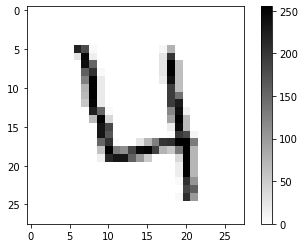

In [ ]:
digit_array = mnist_train.loc[3, "pixel0":]
arr = np.array(digit_array) 

#.reshape(a, (28,28))
image_array = np.reshape(arr, (28,28))

digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)
print("IMAGE LABEL: {}".format(mnist_train.loc[3, "label"]))

PCA Implementation on MNIST Digits

1) Using manual approach:

a) Compute standardization of data

In [ ]:
from sklearn.preprocessing import StandardScaler

standardized_scalar = StandardScaler()
standardized_data = standardized_scalar.fit_transform(mnist_train_data)
standardized_data.shape

(42000, 784)

b) Calculate covariance matrix S(dxd)

In [ ]:
cov_matrix = np.matmul(standardized_data.T, standardized_data)
cov_matrix.shape

(784, 784)

c) Calculate Eigen values and eigen vectors

In [ ]:
from scipy.linalg import eigh

lambdas, vectors = eigh(cov_matrix, eigvals=(782, 783))
vectors.shape

(784, 2)

In [ ]:
vectors = vectors.T
vectors.shape

(2, 784)

d) Calculate unit vectors U1=V1 and new coordinates

In [ ]:
new_coordinates = np.matmul(vectors, standardized_data.T)
print(new_coordinates.shape)
new_coordinates = np.vstack((new_coordinates, mnist_train_label)).T

(2, 42000)


In [ ]:
df_new = pd.DataFrame(new_coordinates, columns=["f1", "f2", "labels"])
df_new.head()

,f1,f2,labels
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


e) Plot FacetGrid using seaborn

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


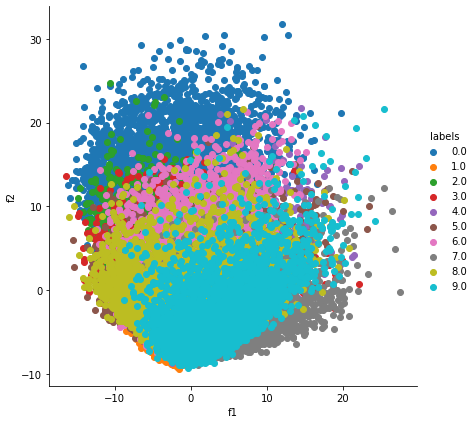

In [ ]:
sns.FacetGrid(df_new, hue="labels", size=6).map(plt.scatter, "f1", "f2").add_legend()
plt.show()

2) Using Sci-kit Learn library:

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)
pca_data.shape

(42000, 2)

In [ ]:
pca_data = np.vstack((pca_data.T, mnist_train_label)).T

In [ ]:
df_PCA = pd.DataFrame(new_coordinates, columns=["f1", "f2", "labels"])
df_PCA.head()

,f1,f2,labels
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


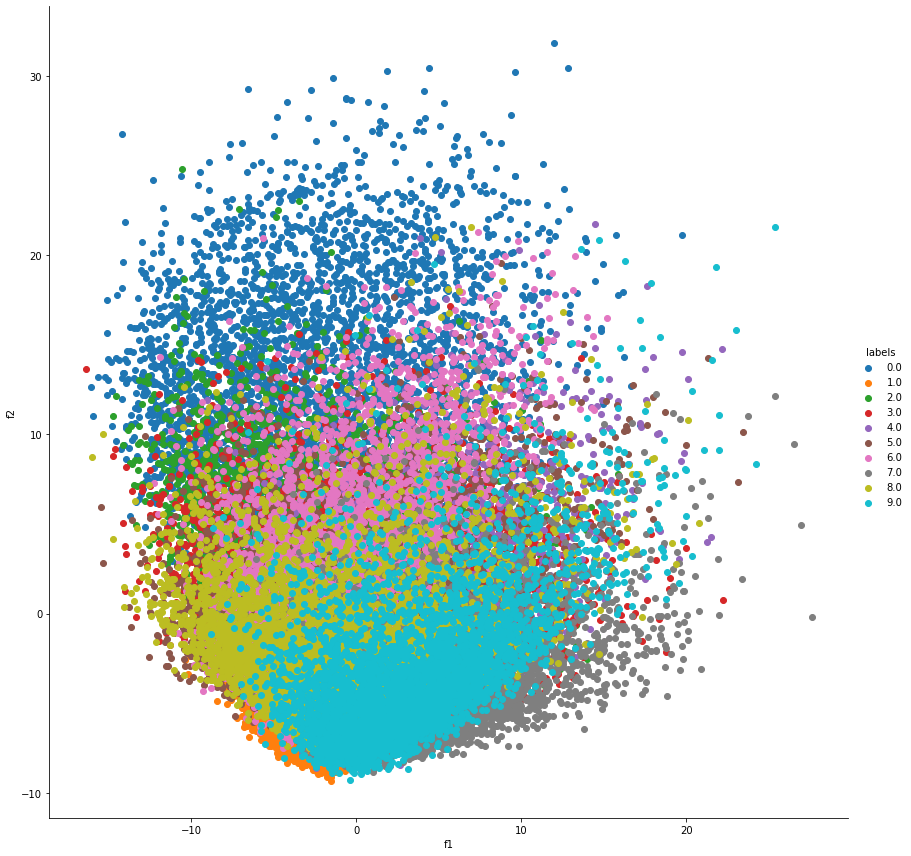

In [ ]:
sns.FacetGrid(df_new, hue="labels", size=12).map(plt.scatter, "f1", "f2").add_legend()
plt.savefig("PCA_FacetGrid.png")
plt.show()

PCA Dimension Reduction

In [ ]:
pca.n_components = 784
pca_data = pca.fit_transform(standardized_data)
percent_variance_retained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_variance_retained = np.cumsum(percent_variance_retained)

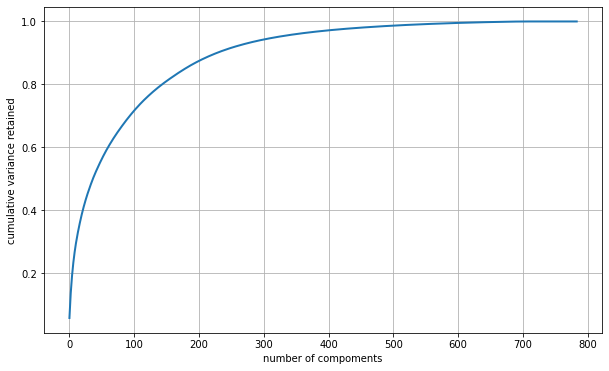

In [ ]:
plt.figure(1, figsize=(10, 6))
plt.clf()
plt.plot(cum_variance_retained, linewidth=2)
plt.axis("tight")
plt.grid()
plt.xlabel("number of compoments")
plt.ylabel("cumulative variance retained")
plt.savefig("pca_cumulative_variance.png")
plt.show()

Data Manipulation

[4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188]


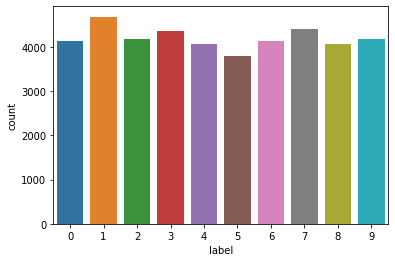

In [ ]:
# Count plot to see the count of all the labels.
sns.countplot(mnist_train.label)
print(list(mnist_train.label.value_counts().sort_index()))

In [ ]:
# Converting dataframe into arrays
mnist_train_data = np.array(mnist_train_data)
mnist_train_label = np.array(mnist_train_label)

In [ ]:
# Reshaping the input shapes to get it in the shape which the model expects to recieve later.
mnist_train_data = mnist_train_data.reshape(mnist_train_data.shape[0], 28, 28, 1)
print(mnist_train_data.shape, mnist_train_label.shape)

(42000, 28, 28, 1) (42000,)


Model Building Process

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adadelta
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler


Encoding train labels

In [ ]:
# Encoding the labels and making them as the class value and finally converting them as categorical values.
nclasses = mnist_train_label.max() - mnist_train_label.min() + 1
mnist_train_label = to_categorical(mnist_train_label, num_classes = nclasses)
print("Shape of ytrain after encoding: ", mnist_train_label.shape)

Shape of ytrain after encoding:  (42000, 10)


Building a Sequential Model

In [ ]:
def build_model(input_shape=(28, 28, 1)):
    model = Sequential()
    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size = 4, activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    return model

def compile_model(model, optimizer='adam', loss='categorical_crossentropy'):
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
    
    
def train_model(model, train, test, epochs, split):
    history = model.fit(train, test, shuffle=True, epochs=epochs, validation_split=split)
    return history

In [ ]:
# Training the model using the above function built to build, compile and train the model
cnn_model = build_model((28, 28, 1))
compile_model(cnn_model, 'adam', 'categorical_crossentropy')

# train the model for 80 epochs.
model_history = train_model(cnn_model, mnist_train_data, mnist_train_label, 80, 0.2)

Epoch 1/80
1050/1050 [==============================] - 125s 119ms/step - loss: 0.2370 - accuracy: 0.9272 - val_loss: 0.0590 - val_accuracy: 0.9808
Epoch 2/80
1050/1050 [==============================] - 123s 117ms/step - loss: 0.0873 - accuracy: 0.9731 - val_loss: 0.0713 - val_accuracy: 0.9789
Epoch 3/80
1050/1050 [==============================] - 122s 117ms/step - loss: 0.0657 - accuracy: 0.9794 - val_loss: 0.0345 - val_accuracy: 0.9885
Epoch 4/80
1050/1050 [==============================] - 124s 118ms/step - loss: 0.0596 - accuracy: 0.9812 - val_loss: 0.0390 - val_accuracy: 0.9883
Epoch 5/80
1050/1050 [==============================] - 123s 117ms/step - loss: 0.0522 - accuracy: 0.9845 - val_loss: 0.0302 - val_accuracy: 0.9907
Epoch 6/80
1050/1050 [==============================] - 124s 118ms/step - loss: 0.0445 - accuracy: 0.9866 - val_loss: 0.0268 - val_accuracy: 0.9929
Epoch 7/80
1050/1050 [==============================] - 122s 116ms/step - loss: 0.0432 - accuracy: 0.9868 - val_

Model Performance Analysis

In [ ]:
def plot_model_performance(metric, validations_metric):
    plt.plot(model_history.history[metric],label = str('Training ' + metric))
    plt.plot(model_history.history[validations_metric],label = str('Validation ' + metric))
    plt.legend()
    plt.savefig(str(metric + '_plot.png'))

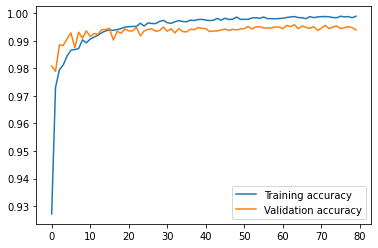

In [ ]:
plot_model_performance('accuracy', 'val_accuracy')

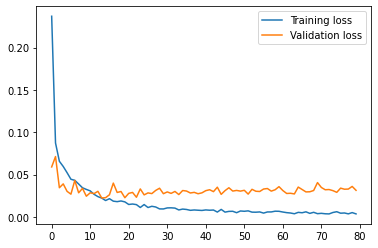

In [ ]:
plot_model_performance('loss', 'val_loss')

Transforming testing data

In [ ]:
mnist_test_arr = np.array(mnist_test)
mnist_test_arr = mnist_test_arr.reshape(mnist_test_arr.shape[0], 28, 28, 1)
print(mnist_test_arr.shape)

(28000, 28, 28, 1)


Prediction & Submission

In [ ]:
predictions = cnn_model.predict(mnist_test_arr)

In [40]:
# Final submissions
predictions_test = []

for i in predictions:
    predictions_test.append(np.argmax(i))

In [41]:
submission =  pd.DataFrame({
        "ImageId": mnist_test.index+1,
        "Label": predictions_test
    })

submission.to_csv('my_submission.csv', index=False)